In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy
import sklearn as sk
from sklearn.linear_model import LinearRegression
from scipy.interpolate import CubicSpline

In [71]:
#/Users/sofia/Desktop/Herramientas computacionales/ua-imec2001-hc-202310-s2/project/data/wind/wind.csv
dfwind = pd.read_csv(filepath_or_buffer='wind/wind.csv')
dfwind.head()

,timestamp,wind_speed_ms-1,temperature
0,2015-01-01 00:00:00,10.48,26.0
1,2015-01-01 01:00:00,10.40,26.1
2,2015-01-01 02:00:00,10.53,26.2
3,2015-01-01 03:00:00,10.52,26.2
4,2015-01-01 04:00:00,10.37,26.1


In [72]:
#Esta parte del codigo cambia los valores que sean =< 27 y >= 7 por 0
dfwind.loc[dfwind['temperature'] >= 27,'wind_speed_ms-1'] = 0
dfwind.loc[dfwind['temperature'] <= 10,'wind_speed_ms-1'] = 0
dfwind

,timestamp,wind_speed_ms-1,temperature
0,2015-01-01 00:00:00,10.48,26.0
1,2015-01-01 01:00:00,10.40,26.1
2,2015-01-01 02:00:00,10.53,26.2
3,2015-01-01 03:00:00,10.52,26.2
4,2015-01-01 04:00:00,10.37,26.1
...,...,...,...
26299,2017-12-31 19:00:00,7.44,25.1
26300,2017-12-31 20:00:00,7.72,25.0
26301,2017-12-31 21:00:00,7.98,25.2
26302,2017-12-31 22:00:00,6.77,25.6


In [73]:
#se comprueba que si se hallan cambiando los valores
chequeo = dfwind['temperature'] >= 27
print(dfwind[chequeo].head(2))

                timestamp  wind_speed_ms-1  temperature
3688  2015-06-03 16:00:00              0.0         27.1
3689  2015-06-03 17:00:00              0.0         27.2


In [74]:
def formato_grafica(titulo, ejex, ejey):
    plt.rcParams['axes.axisbelow'] = True

    plt.title(titulo, fontsize=15)
    plt.ylabel(ejey, fontsize=13)
    plt.xlabel(ejex, fontsize=13)

    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(None, None)
    plt.xlim(None, None)
    plt.grid(True)
    plt.legend(loc='center right')
    plt.tight_layout

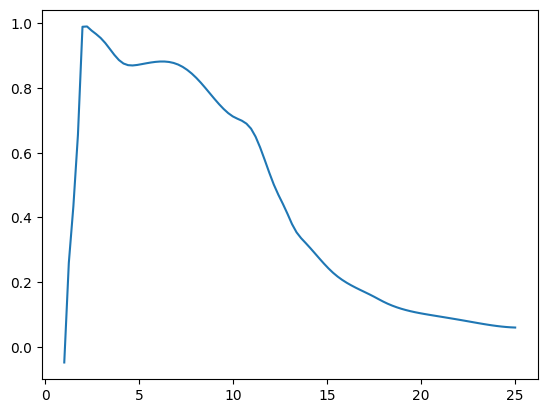

In [75]:
#C:/Users/sofia/Desktop/project/wind/Coeficiente de empuje VS Velocidad Viento (corregido).csv
df_C_empuje = pd.read_csv('wind/Coeficiente de empuje VS Velocidad Viento (corregido).csv')

def interpolador_coeficiente(velocidad_del_viento):
    spline = scipy.interpolate.splrep(df_C_empuje["x"],df_C_empuje["y"],k=3)
    coeficiente = scipy.interpolate.splev(velocidad_del_viento,tck=spline)
    return coeficiente

x = np.linspace(1,25,100)
y = interpolador_coeficiente(x)
plt.plot(x,y)
plt.show()


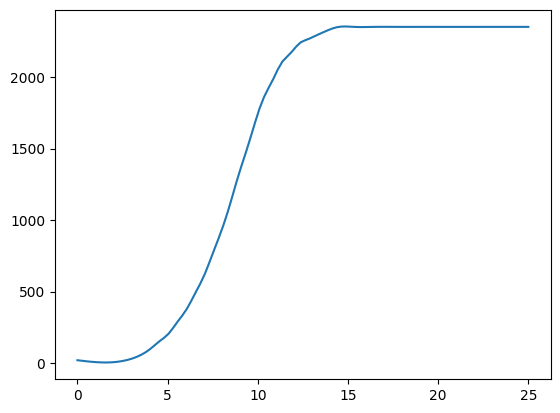

In [76]:

df_potencia = pd.read_csv('wind/Potencia Vs velocidad viento (Corregido).csv')
"""
Como los valores se extrajeron de forma visual hay algunos que sobrepasan los máximos,
por eso se aplica la siguiente funcion que cambia todos los valroes que son mayores al máximo por 2350
"""
def interpolador_potencia(velocidad_del_viento):
    spline = scipy.interpolate.splrep(df_potencia["x"],df_potencia["y"])
    potencia = scipy.interpolate.splev(velocidad_del_viento,spline)
    return potencia
df_potencia.loc[df_potencia['y'] > 2350,'y'] = 2350

x = np.linspace(0,25,100)
y = interpolador_potencia(x)
plt.plot(x,y)

#se chequea con la gráfica que está bien


In [77]:
#velocidad incidente
K_ZG1 = 0.04
K_ZG2_3 = 0.08
D = 92

def velocidad_incidente(velocidad_del_viento,k,x):
    D=92
    
    coeficiente_de_empuje = interpolador_coeficiente(velocidad_del_viento)
    a = (1/2)*(1-np.sqrt(1-coeficiente_de_empuje))
    velocidad_incidente = velocidad_del_viento*(1-((2*a)/(((1+2*k*x)/D)**2)))
    return velocidad_incidente


In [78]:
#generadores 1,2,3,4 y 7 v = v0
#generadores 5 y 6 x=500m, k=K_ZG2_3
#generadores 8 y 9 x=1000m,k=K_ZG2_3
#m=3 n=dfwind.shape[0], puesto que solo hay 3 casos diferentes
headers = ["generadores 1-4 y 7","generadores 5 y 6","generadores 8 y 9"]
df_vx=pd.DataFrame(columns=headers,index=range(dfwind.shape[0]))
print(dfwind.shape[0])
print(df_vx.shape[0])


26304
26304


In [79]:
df_vx["generadores 1-4 y 7"]=dfwind["wind_speed_ms-1"]
df_vx["generadores 5 y 6"]=velocidad_incidente(dfwind["wind_speed_ms-1"],K_ZG2_3,500)
df_vx

,generadores 1-4 y 7,generadores 5 y 6,generadores 8 y 9
0,10.48,4.386090,NaN
1,10.40,4.324503,NaN
2,10.53,4.426779,NaN
3,10.52,4.418481,NaN
4,10.37,4.302249,NaN
...,...,...,...
26299,7.44,1.426126,NaN
26300,7.72,1.640994,NaN
26301,7.98,1.874828,NaN
26302,6.77,1.080129,NaN


In [80]:
df_vx["generadores 8 y 9"]=velocidad_incidente(dfwind["wind_speed_ms-1"],K_ZG2_3,1000)
df_vx

,generadores 1-4 y 7,generadores 5 y 6,generadores 8 y 9
0,10.48,4.386090,8.937538
1,10.40,4.324503,8.862199
2,10.53,4.426779,8.985182
3,10.52,4.418481,8.975612
4,10.37,4.302249,8.834160
...,...,...,...
26299,7.44,1.426126,5.917797
26300,7.72,1.640994,6.181311
26301,7.98,1.874828,6.434688
26302,6.77,1.080129,5.329807


In [81]:
headers2 = ["timestamp","Pgen generadores 1-4 y 7","Pgen generadores 5 y 6","Pgen generadores 8 y 9"]
df_Pg=pd.DataFrame(columns=headers2,index=range(dfwind.shape[0]))
df_Pg["timestamp"]=dfwind["timestamp"]
df_Pg["Pgen generadores 1-4 y 7"]=interpolador_potencia(dfwind["wind_speed_ms-1"])
df_Pg["Pgen generadores 5 y 6"]=interpolador_potencia(df_vx["generadores 5 y 6"])
df_Pg["Pgen generadores 8 y 9"]=interpolador_potencia(df_vx["generadores 8 y 9"])
potencia_total = df_Pg["Pgen generadores 1-4 y 7"].sum()*5+df_Pg["Pgen generadores 5 y 6"].sum()*2+df_Pg["Pgen generadores 8 y 9"].sum()*2
perdidas2porciento = potencia_total*0.02
print(perdidas2porciento)
df_Pg
#que se interpretan de estos datos???

2574804.599101475


,timestamp,Pgen generadores 1-4 y 7,Pgen generadores 5 y 6,Pgen generadores 8 y 9
0,2015-01-01 00:00:00,1894.737105,136.082509,1315.786136
1,2015-01-01 01:00:00,1874.166276,129.469965,1284.321634
2,2015-01-01 02:00:00,1907.027175,140.410515,1335.102295
3,2015-01-01 03:00:00,1904.596884,139.531538,1331.256409
4,2015-01-01 04:00:00,1866.085843,127.071884,1272.358203
...,...,...,...,...
26299,2017-12-31 19:00:00,745.015346,5.113220,350.714400
26300,2017-12-31 20:00:00,836.719134,5.033222,404.115414
26301,2017-12-31 21:00:00,923.488767,6.009052,465.138063
26302,2017-12-31 22:00:00,545.506051,6.906058,250.567939


In [88]:
def energia_electrica(potencia,tiempo):
    energia_electrica = potencia * (tiempo/60)
    return energia_electrica
headers3 = ["timestamp","energia generadores 1-4 y 7","energia generadores 5 y 6","energia generadores 8 y 9"]
df_energia = pd.DataFrame(columns=headers3,index=range(dfwind.shape[0]))
df_energia["timestamp"]=dfwind["timestamp"]
type(df_energia["timestamp"][0])


str